# Homework 2

In [1]:
%matplotlib inline
import numpy as np
import math
from matplotlib import pyplot as plt
from scipy.optimize import fmin, minimize

## Introducing `minimize`

`scipy.optimize.minimize` gives you a bit more information about the fit than fmin. You can even pick the algorithm to do minimization(read the doc if you are interested).

In [3]:
def f(w):
    x, y = w
    return (x-2)**2 + (y-3)**2

bestw = minimize(f, [100,100])
print bestw
#the two important properties are 
#`.x` which give the value of argument that minimize the function
#`.fun` which tell you the value of the function that 
#hesss stands for hessian and jac stands for jacobian. 
# They can be use to find 1 std dev error and correlation between the result among other things.
#I won't get in to it here.

#For this homework try use minimize instead of fmin

print bestw.x
print bestw.fun

      fun: 1.1105851776989653e-16
 hess_inv: array([[ 0.74743596, -0.24998685],
       [-0.24998685,  0.75256404]])
      jac: array([  7.56144025e-11,  -8.00683964e-11])
  message: 'Optimization terminated successfully.'
     nfev: 16
      nit: 2
     njev: 4
   status: 0
  success: True
        x: array([ 1.99999999,  2.99999999])
[ 1.99999999  2.99999999]
1.1105851777e-16


# Problem 1 Exponential loss function.

Recall that in the class we did linear regression using euclidean distance loss function.

$$ f(y') = (y-y')^2 $$

In this problem, we want to investigate a different loss function.

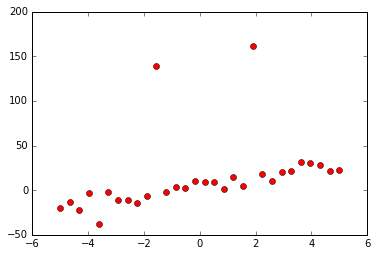

In [4]:
np.random.seed(54321)
ndata = 30
datax = np.linspace(-5,5,ndata)
datay = 5*datax + 3. + np.random.randn(ndata)*10
#do not remove these two lines
datay[10] = datay[10] + 150
datay[20] = datay[20] + 150

plt.plot(datax, datay,'or')

1a) One of these two function is has the right behavior for being a loss function. Identify the suitable one and explain why.

$$ f(y') =  -e^{-(y-y')^2} $$

$$ g(y') =  e^{-(y-y')^2} $$

where $y'$ is the guess and $y$ is an actual datapoint.

$$ f(y') =  -e^{-(y-y')^2} $$

In [ ]:
# The above one is correct because when (y - y^)^2
# So for e to the power that^, it should be large for large errors and small for small errors 
# but 1 / e^ (wtv) if wtv is large will be very small and vice versa

1b) (5)Fit a straight line to the data in `datax` and `datay` with old square cost function. (Do a least square fit)

Start your minimization at [5,3].

Then plot and compare your line with actual data.

[ 5.11146772  3.5573386 ]


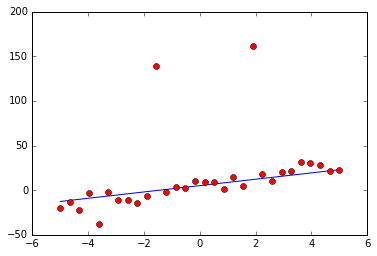

In [28]:
def padme(data):
    xx = len(data)
    new = np.empty((xx, 2))
    new[:,0] = 1
    new[:,1] = data
    return new


def cost(w):
    padded_x = padme(datax)
    summe = 0
    for i in range(datax.size):
        y_hat = np.dot(w,padded_x[i])
        summe = (datay[i] - y_hat)**2
    return summe
    
def prediction(x, minimized):
    return np.dot(padme(x), minimized)

res = minimize(cost, [5,3])
print res.x

x = np.linspace(-5,5,30)
y = prediction(x, res.x)

plt.plot(x,y)
plt.plot(datax, datay,'or')

1c) (80) Fit a straight line to the following data with the cost function you justify in *1a)*.

Start your minimization at [5,3].

Then plot and compare your line with actual data.

-30.0


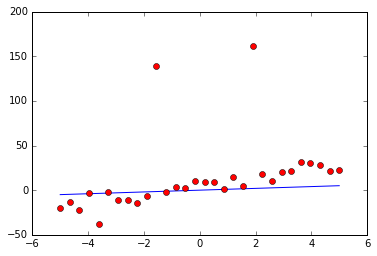

In [32]:
padded_x = padme(datax)

def cost_neg(w):
    return np.sum([-np.exp(-(i - np.dot(w, padded_x[idx]))**2) for idx,i in enumerate(datax)])

res = minimize(cost_neg, [5,3])
print res.fun
xx = np.linspace(-5,5,30)
yy = prediction(xx, res.x)

plt.plot(xx,yy)
plt.plot(datax,datay, "or")

1d) (5) Which one is a better line?

You will find that what you had in 1c) will sort of ignore the two outliers. 

Explain why does the loss function we use in 1c) behave in such a way.

In [ ]:
# First line looks better and has a lower error 

1e) (5) Repeat 1b) but now start at (5, 33). Do you get the same $\vec{w}$?

[-0.65776118  4.71118441]
Nah not same weight


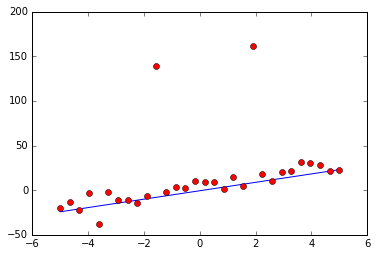

In [29]:
res = minimize(cost, [5,33])
print res.x

x = np.linspace(-5,5,30)
y = prediction(x, res.x)

plt.plot(x,y)
plt.plot(datax, datay,'or')
print "Nah not same weight"

1f) Extra (5) Repeat 1c) but now start at (5, 33). You will find that you line is way off. Explain why? (Hint1: numerical issue) (Hint2: look at `.fun` from minimize)

-0.99999999999


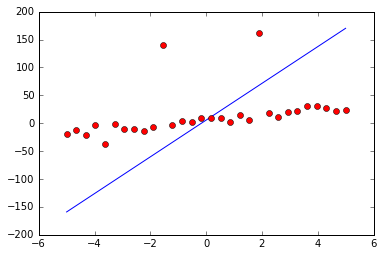

In [34]:
res = minimize(cost_neg, [5,33])

print res.fun
xx = np.linspace(-5,5,30)
yy = prediction(xx, res.x)

plt.plot(xx,yy)
plt.plot(datax,datay, "or")

# exp problems..?

# Problem 2

Consider ther following data.

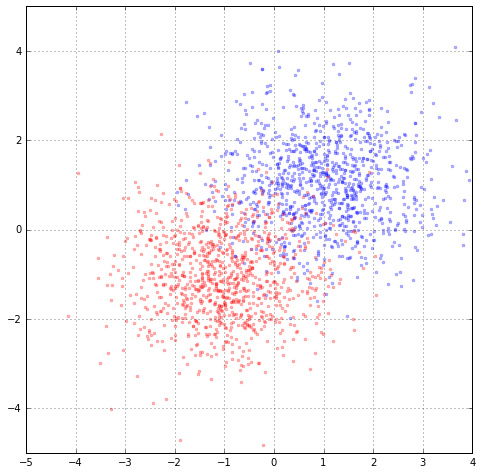

In [3]:
np.random.seed(9999)
ndata = 1000

#class +1
dataxp = np.random.randn(ndata)+1
datayp = np.random.randn(ndata)+1

#class -1
dataxm = np.random.randn(ndata)-1
dataym = np.random.randn(ndata)-1

plt.figure(figsize=(8,8))
plt.plot(dataxp, datayp, '.b', alpha=0.3)
plt.plot(dataxm, dataym, '.r', alpha=0.3)
plt.xlim(-5,4)
plt.xlim(-5,4)
plt.grid(True)

2a) (50) Perform Logistic Regression like we did in class. Find $\vec{w}$

In [24]:
def theta2(x):
    x = np.clip(x, -200, 200, out =x)
    return 1. / (1. + np.exp(-x))

def pad_extra(x,y):
    l = len(x)
    tmp = np.empty((l,3))
    tmp[:,0] = 1
    tmp[:,1] = x
    tmp[:,2] = y
    return tmp

class LogReg:

    def __init__(self):
        self.w = 0
    
    def fit(self,classes,features):
        def cost(w):
            return np.sum(np.log(theta2(-classes*np.dot(features, w))))
        self.w = minimize(cost, [0.]*len(features[0])).x

    def predict(self, features):
        s = np.dot(features, self.w)
        s = np.clip(s, -200, 200)
        return 1./(1 + np.exp(-s))
    
# for exam just change dataxp, datayp, dataxm and dataym respectivelty (also ndata)
data_p = pad_extra(dataxp, datayp)
data_m = pad_extra(dataxm, dataym)
train_data = np.concatenate((data_p, data_m))
classes = np.array([1]* ndata + [-1]* ndata)

lr = LogReg()
lr.fit(classes,train_data)

precision = 0
for m,p in zip(data_m, data_p):
    if lr.predict(p) > 0.5:
        precision +=1
    if lr.predict(m) <= 0.5:
        precision+=1
        
print (float(precision) / (ndata * 2)) * 100, "% Precision"

92.05 % Precision


2b) (50) You will find that it's quite hard to check the answer. One way to do that is to draw a line with 0.5 probability.

Draw a line of 0.5 probability along with data points. Does it match with what you expectation?

Hint: think about $\theta$ and how to get $\theta$ to return 0.5.

Hint2: it has something to do with $\vec{w}$.

Hint3: It is a straight line.

2c) (50) Draw lines of probability 0.1, 0.2 ... 0.9 along with data points.

2d) (50) Draw ROC curve. Use these as test sample.

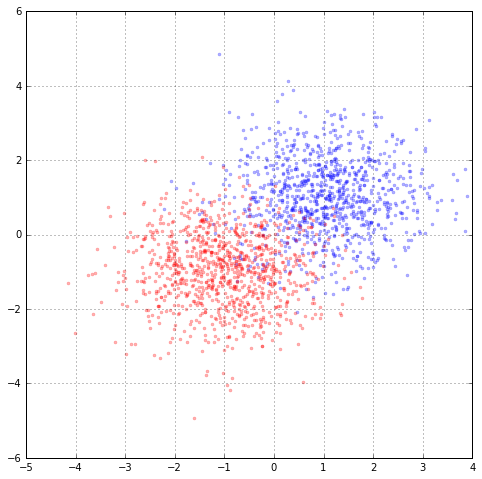

In [121]:
np.random.seed(1111)
ndata = 1000

#class +1
testxp = np.random.randn(ndata)+1
testyp = np.random.randn(ndata)+1

#class -1
testxm = np.random.randn(ndata)-1
testym = np.random.randn(ndata)-1

plt.figure(figsize=(8,8))
plt.plot(testxp, testyp, '.b', alpha=0.3)
plt.plot(testxm, testym, '.r', alpha=0.3)
plt.xlim(-5,4)
plt.xlim(-5,4)
plt.grid(True)